In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data_set = pd.read_csv(r"C:\Users\Varshith\OneDrive\Desktop\dataset.csv")
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values

In [50]:
print(X)

[[1200]
 [ 800]
 [1100]
 [1500]
 [1000]
 [1250]
 [1430]
 [ 920]
 [ 980]
 [1075]
 [1800]
 [1575]
 [1700]
 [ 860]
 [1200]
 [1200]
 [2000]
 [2300]
 [1400]
 [2115]
 [1030]
 [1245]
 [1775]
 [ 870]
 [1850]
 [ 754]
 [2300]
 [1650]
 [2400]]


In [51]:
print(y)

[ 800  500  720 1000  650  850  950  625  640  660 1300 1030 1100  540
  800  790 1500 1800  900 1510  680  840 1240  550 1360  520 1800 1100
 1900]


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
print(X_train)

[[1245]
 [1200]
 [2300]
 [ 860]
 [1200]
 [1575]
 [2300]
 [ 800]
 [1000]
 [1250]
 [1100]
 [1850]
 [1500]
 [ 870]
 [ 754]
 [1400]
 [2400]
 [1030]
 [ 920]
 [1800]
 [1200]
 [2115]
 [1430]]


In [54]:
print(y_train)

[ 840  800 1800  540  790 1030 1800  500  650  850  720 1360 1000  550
  520  900 1900  680  625 1300  800 1510  950]


In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
print(y_pred)

[1188.92777262 1483.854891   1231.06021811 1294.25888633  624.35300316
  704.40464958]


In [58]:
x_pred = regressor.predict(X_train)

In [59]:
print(x_pred)

[ 847.65496422  809.73576328 1736.6495639   523.235134    809.73576328
 1125.7291044  1736.6495639   472.67619942  641.20598135  851.86820876
  725.47087232 1357.45755455 1062.53043618  531.6616231   433.91434958
  978.26554521 1820.91445486  666.48544864  573.79406858 1315.32510907
  809.73576328 1580.75951561 1003.5450125 ]


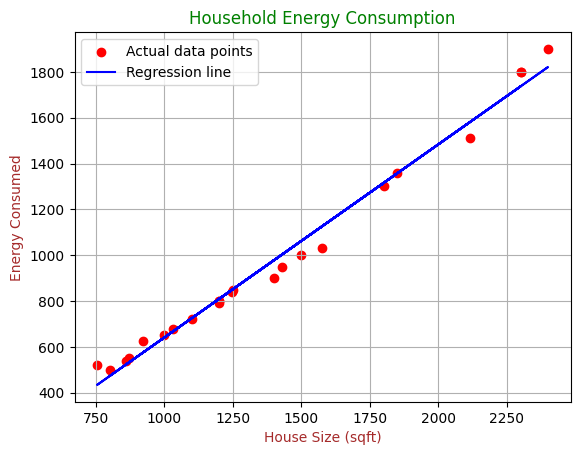

In [60]:
plt.scatter(X_train, y_train, color="red", label="Actual data points")
plt.plot(X_train, x_pred, color="blue", label="Regression line")
plt.title("Household Energy Consumption", color="green")
plt.xlabel("House Size (sqft)", color="brown")
plt.ylabel("Energy Consumed", color="brown")
plt.grid()
plt.legend()
plt.show()

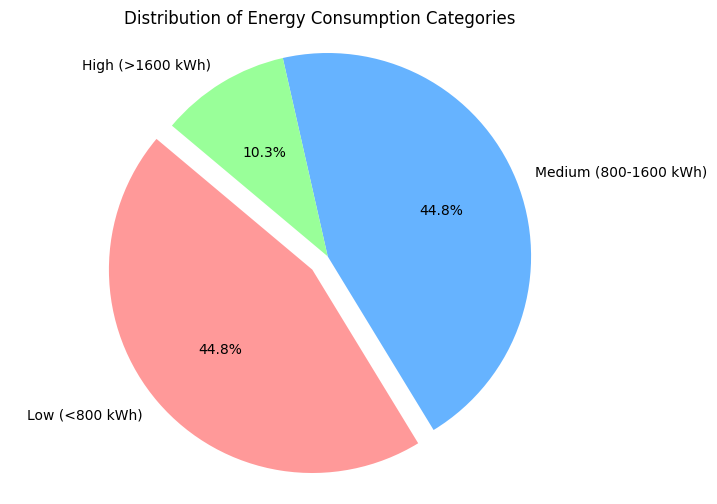

In [61]:

energy_categories = ['Low (<800 kWh)', 'Medium (800-1600 kWh)', 'High (>1600 kWh)']
energy_counts = [len(y[y <= 800]), len(y[(y > 800) & (y <= 1600)]), len(y[y > 1600])]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(energy_counts, labels=energy_categories, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Energy Consumption Categories')
plt.axis('equal') 
plt.show()


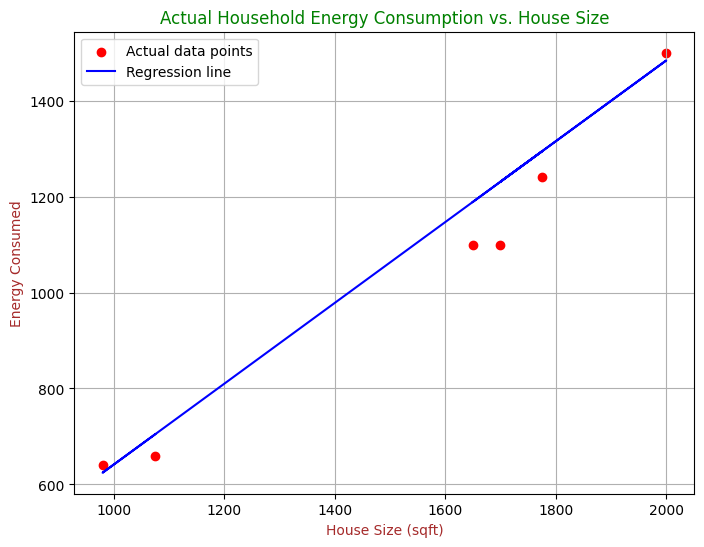

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data points')

plt.plot(X_test, y_pred, color='blue', label='Regression line')

plt.title('Actual Household Energy Consumption vs. House Size', color='green')
plt.xlabel('House Size (sqft)', color='brown')
plt.ylabel('Energy Consumed', color='brown')
plt.grid()
plt.legend()
plt.show()

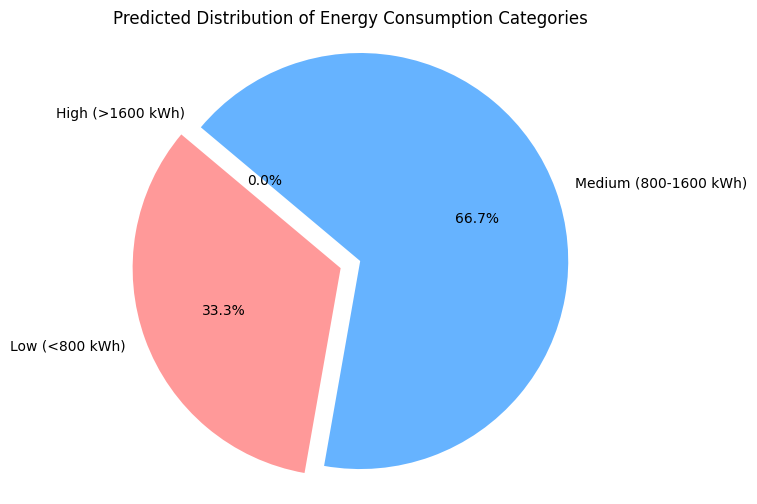

In [63]:

energy_categories = ['Low (<800 kWh)', 'Medium (800-1600 kWh)', 'High (>1600 kWh)']
energy_counts_pred = [sum(y_pred <= 800), sum((y_pred > 800) & (y_pred <= 1600)), sum(y_pred > 1600)]
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)
plt.figure(figsize=(8, 6))
plt.pie(energy_counts_pred, labels=energy_categories, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Predicted Distribution of Energy Consumption Categories')
plt.axis('equal') 
plt.show()


In [65]:
train_data = pd.DataFrame({'House Size (sqft)': X_train.flatten(), 'Energy Consumed': y_train})

C:\Users\Varshith\AppData\Local\Temp\ipykernel_19792\1880159100.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


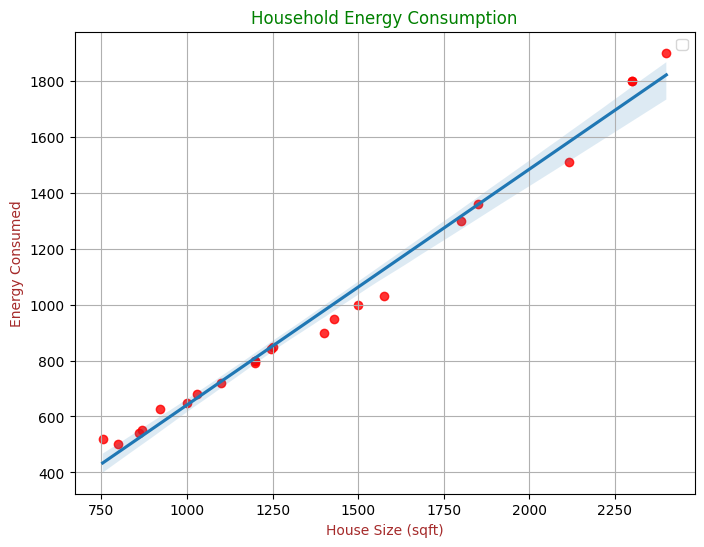

In [66]:
plt.figure(figsize=(8, 6))
sns.regplot(x='House Size (sqft)', y='Energy Consumed', data=train_data, scatter_kws={'color': 'red', 'label': 'Actual data points'})
plt.title('Household Energy Consumption', color='green')
plt.xlabel('House Size (sqft)', color='brown')
plt.ylabel('Energy Consumed', color='brown')
plt.legend()
plt.grid()
plt.show()

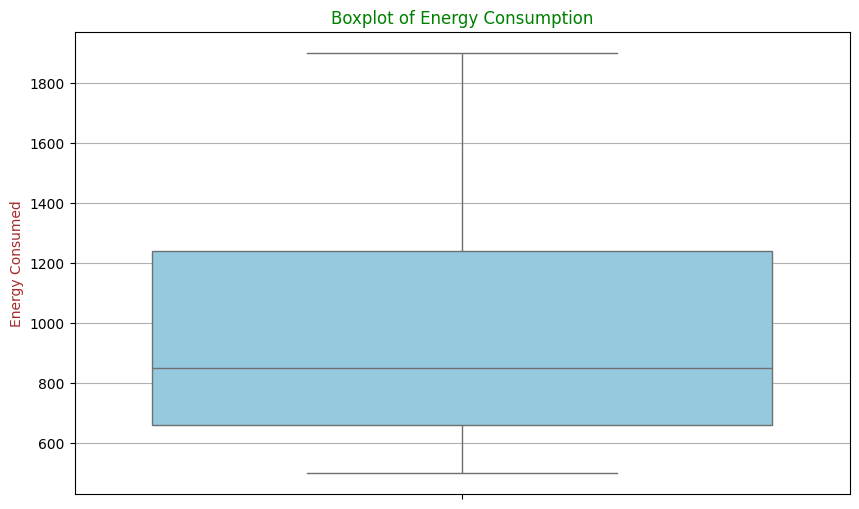

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=y, color='skyblue')
plt.title('Boxplot of Energy Consumption', color='green')
plt.ylabel('Energy Consumed', color='brown')
plt.grid(axis='y') 
plt.show()